# Apple Stock Price Prediction using RNN(LSTM)
#### This is a study of apple stock price prediction using Recurrent Neural Networks for the Mini Project (IT2291), 2022.

In [43]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


data = pd.read_csv('./AAPL.csv', date_parser = True)
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400


In [44]:
Dtrain = data[data['Date']<'2020-12-31'].copy()
Dtest = data[data['Date']>='2020-12-31'].copy()
Dtrain = Dtrain.drop(['Date', 'Adj Close'], axis = 1)
Dtest = Dtest.drop(['Date', 'Adj Close'], axis = 1)
Dtrain.head(10)
#Dtest.head(10)

#Scaling and bringing the values in the range Min-Max
scaler = MinMaxScaler((0, 1))
scaler.fit(Dtrain)
print(scaler.data_max_)
print(scaler.data_min_)
Ymax=scaler.data_max_[0]
Ymin=scaler.data_min_[0]
Dtrain=scaler.transform(Dtrain)

[1.38050003e+02 1.38789993e+02 1.34339996e+02 1.36690002e+02
 7.42164080e+09]
[0.049665 0.049665 0.049107 0.049107 0.      ]


##### Splitting the data into Xtrain and Ytrain

In [45]:
Xtrain=[]
Ytrain=[]
Dtrain.shape[0]

10099


##### For every day, we are keeping past 60 days data in the XTrain, then we will be keeping current day Open Price in YTrain
##### For example XTrain[101] will contain 60*5 matrix of last 60 days data before 101st day, this is done to prevent overfitting, we are creating 50 timesteps
##### YTrain[101] will contain the price at which stock opnened on the 101st day

In [46]:

for i in range(80, Dtrain.shape[0]):
    Xtrain.append(Dtrain[i-80:i])
    Ytrain.append(Dtrain[i, 0])

In [47]:
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)
print(Xtrain.shape)
print(Ytrain.shape)

(10019, 80, 5)
(10019,)


### Building RNN

In [31]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 90, activation = 'relu', return_sequences = True, input_shape = (Xtrain.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='relu'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 80, 90)            34560     
                                                                 
 dropout_8 (Dropout)         (None, 80, 90)            0         
                                                                 
 lstm_9 (LSTM)               (None, 80, 90)            65160     
                                                                 
 dropout_9 (Dropout)         (None, 80, 90)            0         
                                                                 
 lstm_10 (LSTM)              (None, 80, 120)           101280    
                                                                 
 dropout_10 (Dropout)        (None, 80, 120)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

### Training

In [33]:
model.compile(optimizer='adam', loss = 'mean_squared_error',  metrics='accuracy')
model.fit(Xtrain, Ytrain, epochs=5, batch_size=50)

Epoch 1/5
201/201 [==============================] - 66s 300ms/step - loss: 0.0014 - accuracy: 1.9962e-04
Epoch 2/5
201/201 [==============================] - 62s 308ms/step - loss: 5.8999e-04 - accuracy: 1.9962e-04
Epoch 3/5
201/201 [==============================] - 60s 299ms/step - loss: 4.2221e-04 - accuracy: 1.9962e-04
Epoch 4/5
201/201 [==============================] - 60s 299ms/step - loss: 3.5569e-04 - accuracy: 1.9962e-04
Epoch 5/5
201/201 [==============================] - 60s 300ms/step - loss: 3.8863e-04 - accuracy: 1.9962e-04


### Preparing the test dataset

In [34]:
Dt = data[data['Date']<'2020-12-31'].copy()
last80days = Dt.tail(80)
last80days=last80days.drop(['Date', 'Adj Close'], axis = 1)
#last60days.head()
dataTest = last80days.append(Dtest, ignore_index = True)
dataTest.tail()

/tmp/ipykernel_39952/3961747049.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataTest = last80days.append(Dtest, ignore_index = True)


,Open,High,Low,Close,Volume
410,161.119995,163.169998,158.460007,162.880005,96046400
411,162.250000,162.339996,156.720001,156.800003,95623200
412,155.910004,159.789993,155.380005,156.570007,88063200
413,159.250000,164.520004,158.929993,163.639999,130216800
414,161.839996,166.199997,157.250000,157.649994,131587100


In [37]:
scaler.fit(dataTest)
YmaxTest=scaler.data_max_[0]
YminTest=scaler.data_min_[0]
d=scaler.transform(dataTest)
Xtest = []
Ytest = []
for i in range(80, d.shape[0]):
    Xtest.append(d[i-80:i])
    Ytest.append(d[i, 0])
Xtest, Ytest = np.array(Xtest), np.array(Ytest)

### Prediction
##### Storing the predicted values in Ypred

In [38]:
Ypred=model.predict(Xtest)

##### Inverse Scaling the prices to original scale

In [39]:
YpredN=[]
for i in Ypred:
    YpredN.append(i[0]*(YmaxTest-YminTest)+YminTest)
Ypred=YpredN
YtestN=[]
for i in Ytest:
    YtestN.append(i*(YmaxTest-YminTest)+YminTest)
Ytest=YtestN
Ypred=np.array(Ypred)
Ytest=np.array(Ytest)

In [40]:
print(Ytest[0])
print(Ypred[0])

134.080002
125.13874499376607


### Visualization

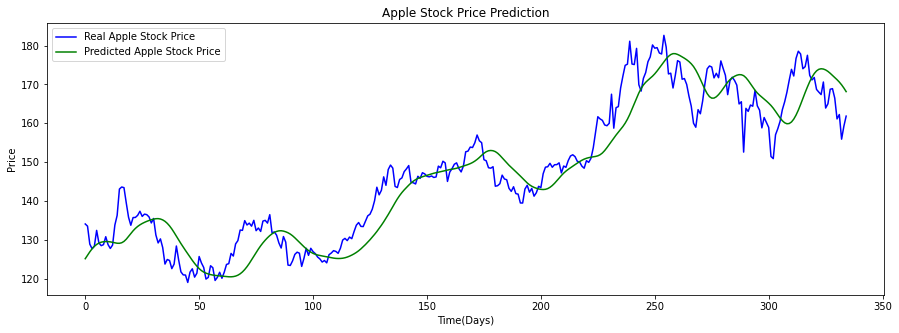

In [41]:
plt.figure(figsize=(15,5))
plt.plot(Ytest, color = 'blue', label = 'Real Apple Stock Price')
plt.plot(Ypred, color = 'green', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluation

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Ytest, Ypred)
print('Mean Squared Error = ', mse)

r2s=r2_score(Ytest, Ypred)
print('R2 Score (Max is 1) = ',r2s)


Mean Squared Error =  39.34950716950907
R2 Score (Max is 1) =  0.8704368938999856
